In [3]:
import pandas as pd
import numpy as np
pima = pd.read_csv('diabetes.csv', header=None, names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree', 'age', 'label'])
pima = pima[1:]

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.shape

(768, 9)

In [6]:
Y = pima.label
X = pima.drop(['label'],axis = 1)

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
import seaborn as sns; sns.set()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=True)

In [10]:
X_train.shape

(614, 8)

In [11]:
lr1 = LogisticRegression()
lr1.fit(X_train,y_train)
print('Обучающая выборка: {:.2f}'.format(lr1.score(X_train, y_train)))
print('Тестовая выборка: {:.2f}'.format(lr1.score(X_test, y_test)))

Обучающая выборка: 0.77
Тестовая выборка: 0.78


In [12]:
lr2 = SVC(gamma='auto')
lr2.fit(X_train,y_train)
print('Обучающая выборка: {:.2f}'.format(lr2.score(X_train, y_train)))
print('Тестовая выборка: {:.2f}'.format(lr2.score(X_test, y_test)))

Обучающая выборка: 1.00
Тестовая выборка: 0.64


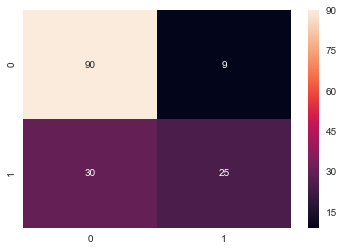

In [13]:
Y0 = lr1.predict(X_test)
a_test = np.array([len(y_test[y_test == Y0][y_test == '0']), len(y_test[y_test != Y0][y_test == '0']),
                   len(y_test[y_test == Y0][y_test == '1']),  len(y_test[y_test != Y0][y_test == '1']) ]).reshape(2,2)
sns.heatmap(a_test, annot=True, fmt='d')

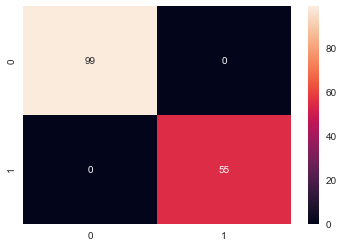

In [14]:
X0 = lr2.predict(X_test)
a_test = np.array([len(y_test[y_test == X0][y_test == '0']), len(y_test[y_test != X0][y_test == '0']),
                   len(y_test[y_test == X0][y_test == '1']),  len(y_test[y_test != X0][y_test == '1']) ]).reshape(2,2)
sns.heatmap(a_test, annot=True, fmt='d')